# A Prediction of Ames House Price
---
### Research task for Data Analysis course at SSE masters program
### HSE, spring of 2020

**Authors:** [Miron Rogovets](https://github.com/Mist3r-R), [Demid Afonichev](https://github.com/demidafonichev)

---

![house](images/housesbanner.png)

The dataset was taken from **"House Prices: Advanced Regression Techniques"** [competition on Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

With *SalePrice* target variable and *79 explanatory variables* it describes (almost) every aspect of residential homes in Ames, Iowa.

Full data description, as well as competition description and more details, can be found via link above.

---

## Table of contents

1. [Data exploration](#data-expl)
    - [Target variable analysis](#target-an)
    - [Outliers](#outliers)
    - [Missing data](#missing)  
 
 
2. [Data preprocessing](#data-prep)
     - [Filling missing data](#fill-missing)
     - [Outliers removing](#rem-outliers)
     - [SalePrice normalization](#num-tar)
     - [Numeric features fixing](#num-fix)



---

First, we start with imports and data output configuration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
#Limit floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

Now we can load our data. The dataset is already split into train and test parts.

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print('train : ' + str(train.shape))
print('test : ' + str(test.shape))

train : (1460, 81)
test : (1459, 80)


In [4]:
# Preview train data
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
# Preview test data
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


## 1. Data exploration <a name="data-expl"></a>

Full list of variables in our dataset:

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Let's examine types of our variables:

In [7]:
for t in train.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, train.dtypes[train.dtypes==t].index.values))

Type: int64
['Id' 'MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'GarageArea' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'MiscVal' 'MoSold' 'YrSold' 'SalePrice']

Type: object
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType

We should pay attention to the fact that not every numeric feature is really numeric according to <code>data_description.txt</code> and keep it in mind when we proceed to features engineering.

We can also drop __ID__ variable, since we're not interested in it:

In [8]:
train.drop(columns=['Id'], inplace=True)
test_ids = test.Id
test.drop(columns=['Id'], inplace=True)
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [9]:
print('train : ' + str(train.shape))
print('test : ' + str(test.shape))

train : (1460, 80)
test : (1459, 79)


### Target variable analysis <a name="target-an"></a>

**'SalePrice'** is the variable we're trying to predict, so we start our analysis with it's exploration.

In [10]:
train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

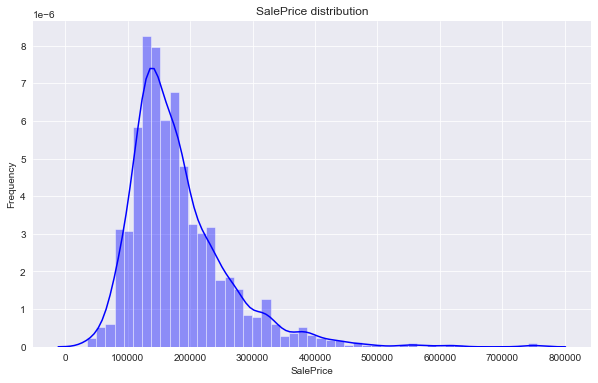

In [11]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(train['SalePrice'], color='b');
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

We can have a look at the **Normal probability plot**: data distribution should closely follow the diagonal that represents the normal distribution.

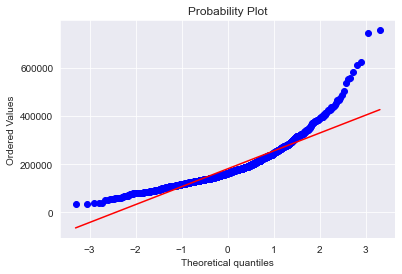

In [12]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [13]:
print('Skewness: {:.4f}'.format(train['SalePrice'].skew()))
print('Kurtosis: {:.4f}'.format(train['SalePrice'].kurt()))

Skewness: 1.8829
Kurtosis: 6.5363


We can see that the target variable:
* deviates from normal distribution
* is positevly skewed and leptokurtic
* does not follow the diagonal line

#### Target variable's relationship with other variables

We start with correlation matrix (heatmap style):

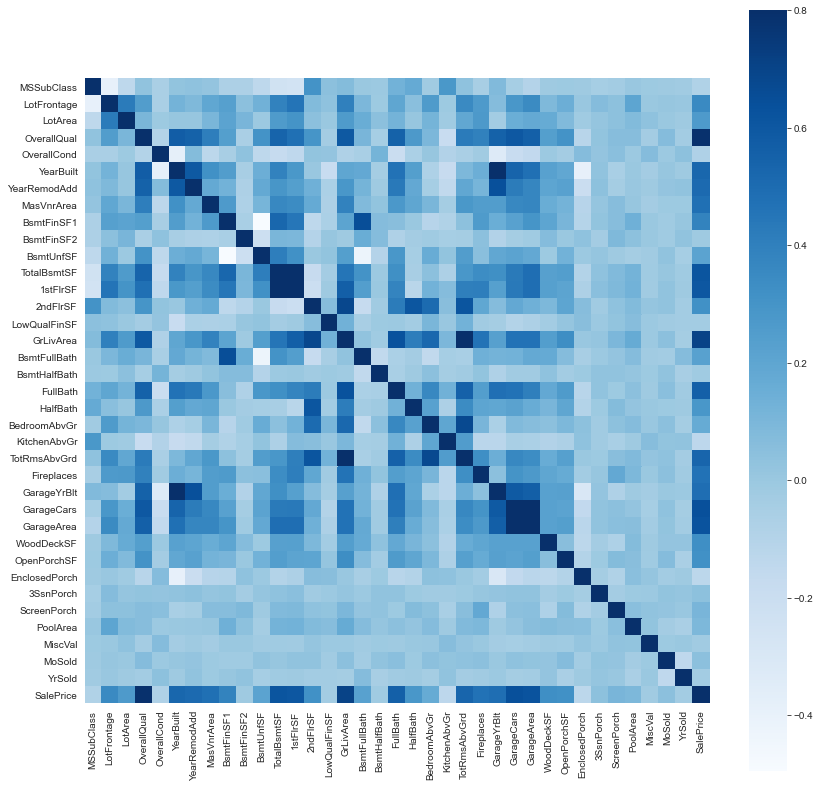

In [14]:
corr = train.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=.8, square=True, cmap='Blues')
plt.show()

We can see that there are two dark squares with very high correlation. The first one consists of __'TotalBsmtSF'__ and __'1stFlrSF'__ variables, and the second one consists of __'Garage'__ variables.

We should also pay attention to __'SalePrice'__ correlations. __'OverallQual'__  and __'GrLivArea'__ have the highest correlation, but we can also notice many other variables that should be taken into account.

Then we build correlation matrix for 'SalePrice':

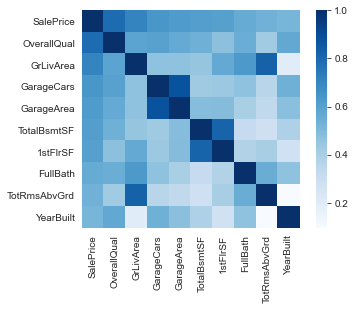

In [15]:
cols = corr.nlargest(10, 'SalePrice').index
sns.heatmap(np.corrcoef(train[cols].values.T), square=True, 
            yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

We can see the following from the heatmap above:
- 'OverallQual'and GrLivArea' have the highest correlation with 'SalePrice'
- 'GarageCars' and 'GarageArea' also have strong correlation with target variable. At the same time their correlation with each other is very strong too, which can be explained as the larger area of the garage can fit more cars. We should keep only one of them ('GarageCars', as it has higher correlation) when we proceed to price prediction
- The situation is the same with 'TotalBsmtSF' and '1stFlrSF'. This can be explained by an assumption that many houses in our data don't have 2nd floors, so total area fully depends on the area of 1st floor. We will check the assumption later.
- The same is with 'TotRmsAbvGrd' and 'GrLivArea' (the total area fully depends on area of all rooms)

Then, we should check the scatterplots:

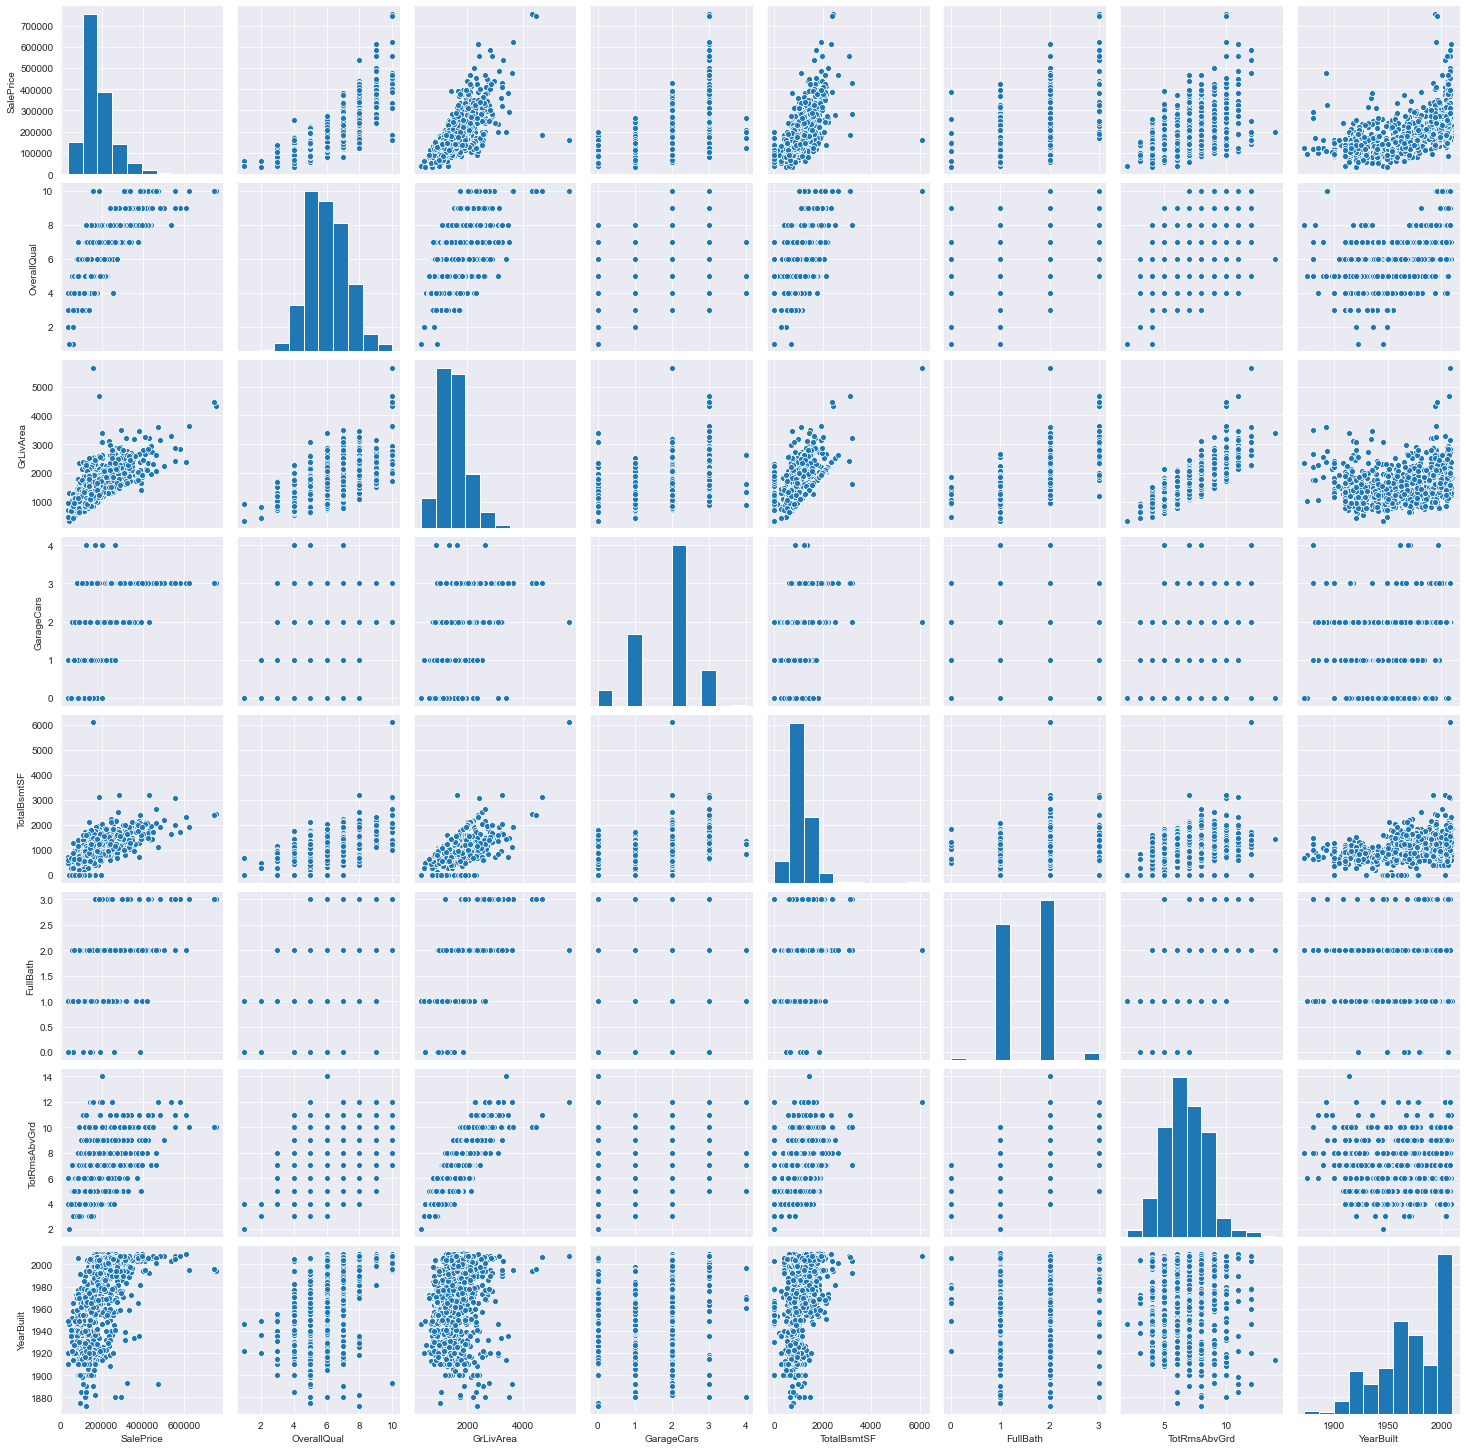

In [16]:
sns.pairplot(train[cols.drop(['GarageArea', '1stFlrSF'])], size=2.5)
plt.show()

We can see some outliers present in our dataset and some interesting patterns in variables relationship.

### Outliers <a name="outliers"></a>

Let's have a closer look at 'GrLivArea' and 'TotalBsmtSF':

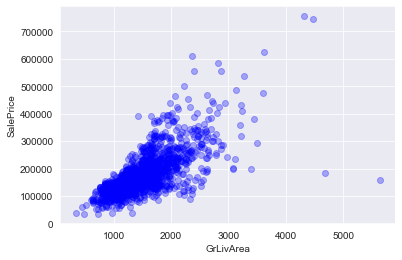

In [17]:
plt.scatter(train.GrLivArea, train.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

We can see 2 extreme outliers on the bottom right: really large houses were sold for really cheap.

Moreover, the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset. Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

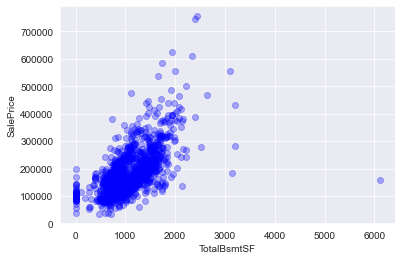

In [18]:
plt.scatter(train.TotalBsmtSF, train.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

We can see a positive linear relationship in both cases.

And let's have a look at 'OverallQual' and 'YearBuilt':

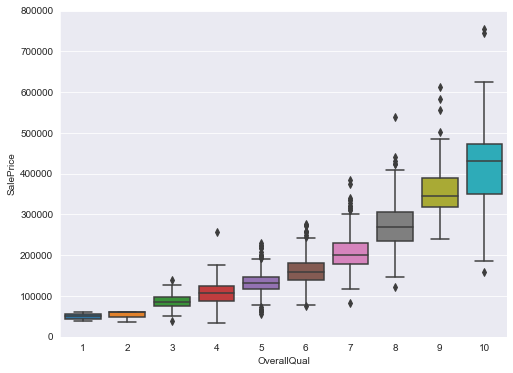

In [19]:
plt.figure(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y='SalePrice', 
                  data=pd.concat([train['SalePrice'], train['OverallQual']], axis=1))
fig.axis(ymin=0, ymax=800000)
plt.show()

Everything seems to be OK (the higher the quality, the higher the price)

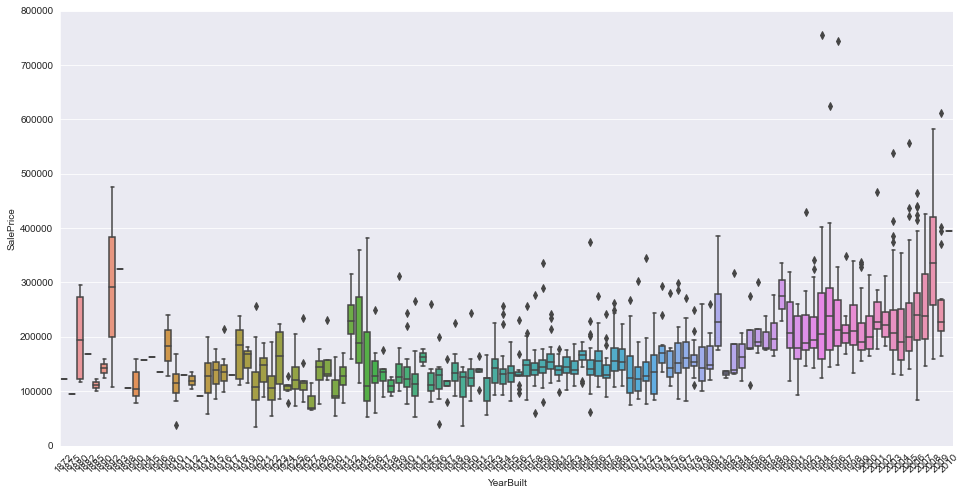

In [20]:
plt.figure(figsize=(16, 8))
fig = sns.boxplot(x=train['YearBuilt'], y="SalePrice", 
                  data=pd.concat([train['SalePrice'], train['YearBuilt']], axis=1))
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45)
plt.show()

Looks like the price for the new houses is likely to be higher than for the old ones.

### Missing data <a name="missing"></a>

In [21]:
missing = (train.isna().sum() / len(train)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Ratio' : missing})
missing

,Ratio
PoolQC,99.521
MiscFeature,96.301
Alley,93.767
Fence,80.753
FireplaceQu,47.260
LotFrontage,17.740
GarageYrBlt,5.548
GarageType,5.548
GarageFinish,5.548
GarageQual,5.548


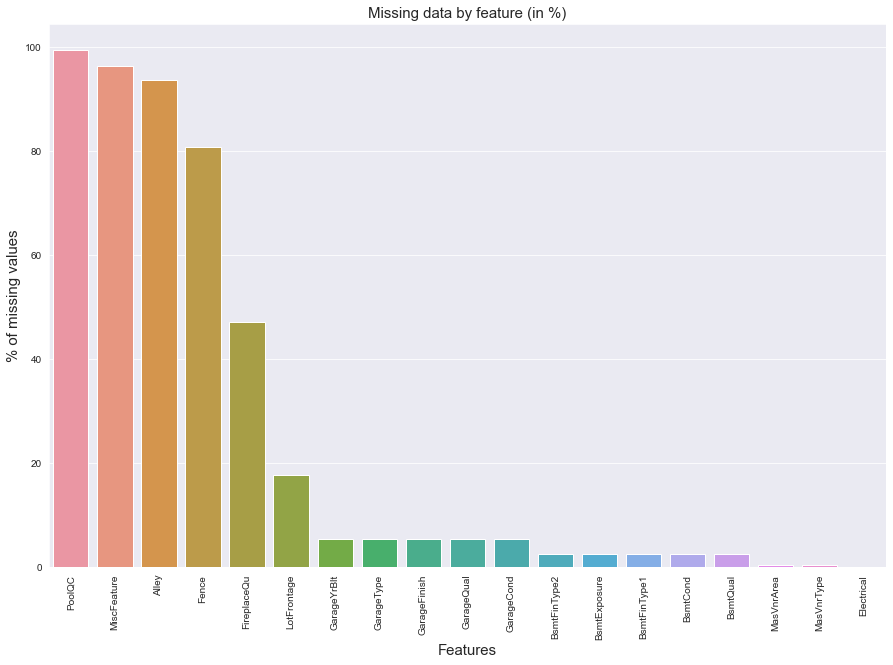

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x=missing.index, y=missing.Ratio)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('% of missing values', fontsize=15)
plt.title('Missing data by feature (in %)', fontsize=15)
plt.show()

In [23]:
missing_test = (test.isna().sum() / len(test)) * 100
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
missing_test = pd.DataFrame({'Ratio' : missing_test})
missing_test

,Ratio
PoolQC,99.794
MiscFeature,96.504
Alley,92.666
Fence,80.123
FireplaceQu,50.034
LotFrontage,15.559
GarageYrBlt,5.346
GarageCond,5.346
GarageQual,5.346
GarageFinish,5.346


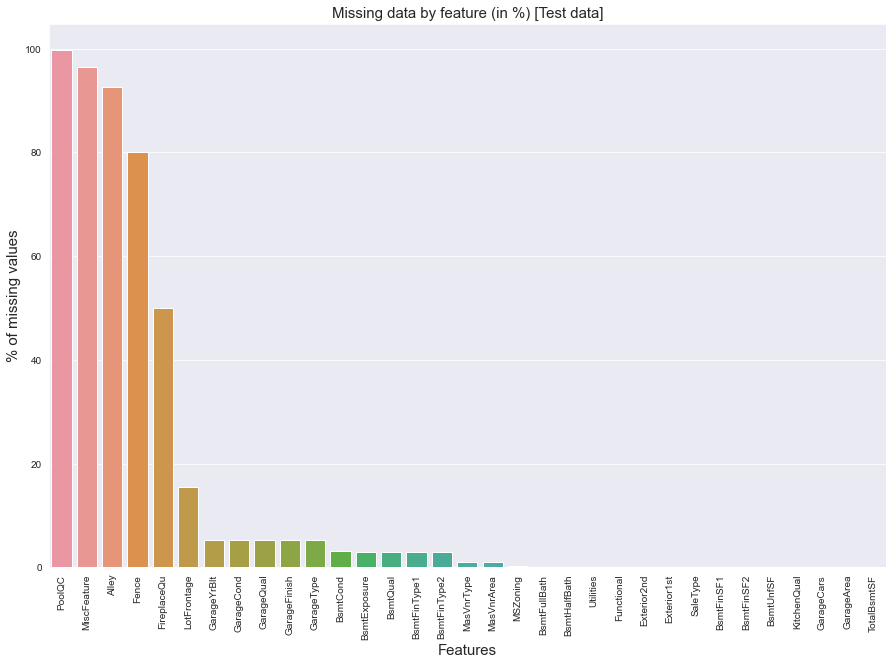

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x=missing_test.index, y=missing_test.Ratio)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('% of missing values', fontsize=15)
plt.title('Missing data by feature (in %) [Test data]', fontsize=15)
plt.show()

Looks like most part of the data is missing for 'PoolQC', 'MiscFeature', 'Alley' and 'Fence'. But since these vairables represent the quality or type of particular feature, _NaN_ value represents the absense of them.

The same is true about other categorical features. 

We can also note that there are several variables that have missing values only in test data.

In [25]:
only_train = [i for i in missing.index if i not in missing_test.index]
only_test = [i for i in missing_test.index if i not in missing.index]
print('Only in train data:\n{}\n'.format(only_train))
print('Only in test data:\n{}'.format(only_test))

Only in train data:
['Electrical']

Only in test data:
['MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


We should also check if we have any categorical variables with the same values for the whole dataset:

In [26]:
for c in test.dtypes[train.dtypes=='object'].index.values:
    if len(test[c].dropna().unique()) == 1:
        print(c)

Utilities


In [27]:
print(train.Utilities.value_counts())
print(test.Utilities.value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1457
Name: Utilities, dtype: int64


We do not really need this variable, since it won't tell us anything in prediction.

---

## 2. Data preprocessing <a name="data-prep"></a>

After exploring the data we should preprocess it. We start with filling missing values and recoding some numerical variables that are really categorical. Then we deal with outliers and normalization of target variable. Finally, we fix numeric features.

First, we drop **Utilities** variable:

In [28]:
train.drop(columns=['Utilities'], inplace=True)
test.drop(columns=['Utilities'], inplace=True)

### Filling missing data <a name="fill-missing"></a>

The strategy is the following:

- **PoolQC:** data description says NaN means "no pool"
- **Fence:** data description says NaN means "no fence"
- **MiscFeature:** data description says NaN means "no misc feature"
- **Alley:** data description says NaN means "no alley access"
- **FireplaceQu:** data description says NaN means "no fireplace"
- **GarageType, GarageFinish, GarageQual & GarageCond:** data description says NaN means "no garage"
- **GarageYrBlt, GarageArea & GarageCars:** replacing missing data with 0 (no garage == no cars)
- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 & BsmtFinType2:** data description says NaN means "no basement"
- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath & BsmtHalfBath:** NaN values are likely zero (since no basement)
- **LotFrontage:** since the areas of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median **LotFrontage** of the neighborhood
- **MasVnrArea & MasVnrType:** NaN most likely means no masonry veneer
- **Functional:** data description says NaN means typical ('Typ')
- **MSSubClass:** NaN most likely means No building class
- **MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd & SaleType:** all of them have too little number of missing values and can be replaced with most common values

Then, we should convert some non-numeric variables that are stored in numbers into strings

In [29]:
def convert(data):
    data['MSSubClass'] = data['MSSubClass'].apply(str)
    data['YrSold'] = data['YrSold'].astype(str)
    data['MoSold'] = data['MoSold'].astype(str)
    return data

In [30]:
train = convert(train)
test = convert(test)

In [31]:
def fill_missing(data):
    for c in ['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu']:
        data[c] = data[c].fillna('None')
    
    for c in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        data[c] = data[c].fillna('None')
    
    for c in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
        data[c] = data[c].fillna(0)
    
    for c in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
        data[c] = data[c].fillna('None')
    
    for c in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
        data[c] = data[c].fillna(0)
    
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
    data['MasVnrType'] = data['MasVnrType'].fillna('None')
    data['MSSubClass'] = data['MSSubClass'].fillna('None')
    data['Functional'] = data['Functional'].fillna('Typ')
    
    for c in ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
        data[c] = data[c].mode()[0]
    
    return data
    

In [32]:
train = fill_missing(train)
test = fill_missing(test)

Let's check if we filled all missing values:

In [33]:
print('Train: {}'.format(train.isna().sum().sum()))
print('Test: {}'.format(test.isna().sum().sum()))

Train: 0
Test: 0


All data seems to be cleaned, now we can proceed to dealing with outliers.

### Outliers removing <a name="rem-outliers"></a>

From the **Data exploration** section we remember that 'GrLivArea' has outliers that should be removed. Now, let's get rid of them:

In [36]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

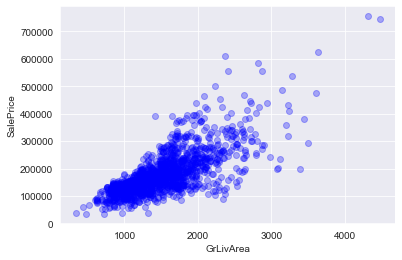

In [37]:
plt.scatter(train.GrLivArea, train.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### SalePrice normalization <a name="num-tar"></a>

As we remember, our target variable deviates from normal distribution, so we should fix it.

This can be achieved with log-transformation ( $log(1+x)$ ):

In [38]:
train['SalePrice'] = np.log1p(train['SalePrice'])

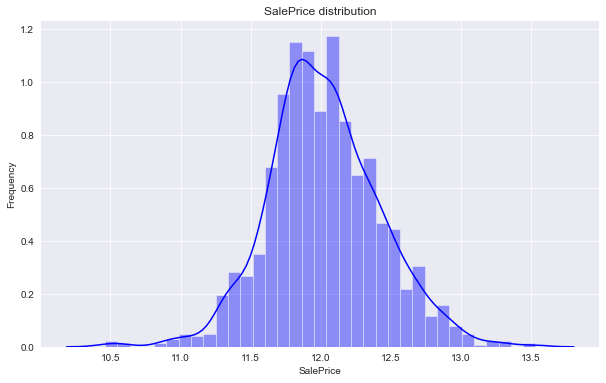

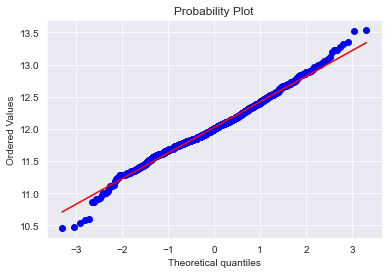

In [40]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(train['SalePrice'], color='b');
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The variable appears to be normally distributed.

Now we can proceed to fixing numeric features.

### Numeric features fixing <a name="num-fix"></a>

---